#### Rede Neural com TensorFlow

In [1]:
# Importação das Bibliotecas
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
tf.__version__

'2.10.0'

In [2]:
# Importando a base de dados
df = pd.read_csv('./data/personagens.csv')
df.shape

(293, 7)

In [3]:
# Visualizando o Cabeçalho
df.head()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
0,6.886102,3.495204,1.484984,0.000000,0.0,0.062954,Bart
1,5.004901,3.183889,1.000142,0.000000,0.0,0.033024,Bart
2,5.264620,5.029683,0.283567,0.000000,0.0,0.151573,Bart
3,0.000000,0.000000,0.000000,0.480168,0.0,0.021164,Bart
4,8.978929,3.459119,0.000000,0.000000,0.0,0.011593,Bart


In [4]:
# Visualizando o final
df.tail()

,laranja_camisa_bart,azul_calcao_bart,azul_sapato_bart,marrom_boca_homer,azul_calca_homer,cinza_sapato_homer,classe
288,0.0,0.0,0.0,0.000000,6.485412,0.093921,Homer
289,0.0,0.0,0.0,0.000000,0.000000,0.042194,Homer
290,0.0,0.0,0.0,0.000000,4.263629,0.076761,Homer
291,0.0,0.0,0.0,0.000000,1.429134,0.017013,Homer
292,0.0,0.0,0.0,13.744248,0.853902,0.063546,Homer


<AxesSubplot:xlabel='classe', ylabel='count'>

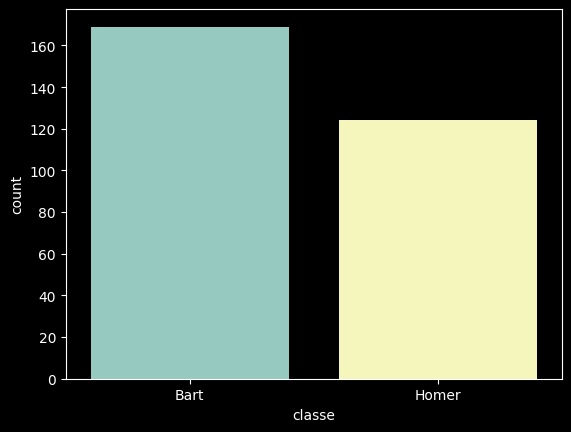

In [5]:
# Visualizando em forma de gráficos
sns.countplot(x = "classe", data=df)

<AxesSubplot:>

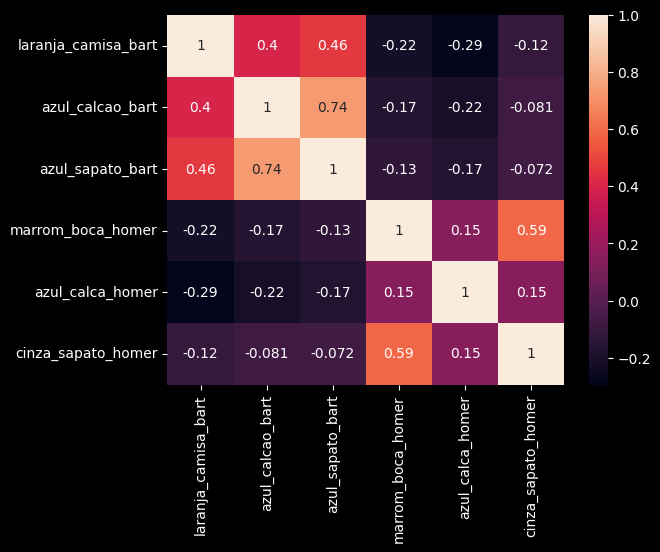

In [6]:
# gerando um map de calor
sns.heatmap(df.corr(), annot=True)

In [7]:
# Separando as classes
X = df.iloc[:, 0:6].values
y = df.iloc[:, 6].values
X

array([[ 6.886102  ,  3.4952044 ,  1.4849836 ,  0.        ,  0.        ,
         0.06295441],
       [ 5.004901  ,  3.1838887 ,  1.0001415 ,  0.        ,  0.        ,
         0.03302354],
       [ 5.2646203 ,  5.0296826 ,  0.283567  ,  0.        ,  0.        ,
         0.15157256],
       ...,
       [ 0.        ,  0.        ,  0.        ,  0.        ,  4.2636285 ,
         0.07676148],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.4291335 ,
         0.01701349],
       [ 0.        ,  0.        ,  0.        , 13.744248  ,  0.853902  ,
         0.0635462 ]])

In [8]:
# Convertendo as variáveis 
y = (y == "Bart")
y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [9]:
# Dividindo a base de dados em treino e teste
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size= 0.2)

X_treinamento.shape, y_treinamento.shape

((234, 6), (234,))

##### Construção e Treinamento da Rede Neural

In [10]:
# Criando a rede neural
rede_neural = tf.keras.models.Sequential()
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu', input_shape=(6,)))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=4, activation='relu'))
rede_neural.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [11]:
# Visualizando
rede_neural.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 28        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Configurando 
rede_neural.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# Treinando a rede
historico = rede_neural.fit(X_treinamento, y_treinamento, epochs=1024, validation_split=0.1)

Epoch 1/1024
7/7 [==============================] - 2s 46ms/step - loss: 0.7344 - accuracy: 0.4000 - val_loss: 0.7410 - val_accuracy: 0.4583
Epoch 2/1024
7/7 [==============================] - 0s 7ms/step - loss: 0.7227 - accuracy: 0.4190 - val_loss: 0.7313 - val_accuracy: 0.4583
Epoch 3/1024
7/7 [==============================] - 0s 7ms/step - loss: 0.7124 - accuracy: 0.4429 - val_loss: 0.7238 - val_accuracy: 0.4583
Epoch 4/1024
7/7 [==============================] - 0s 8ms/step - loss: 0.7051 - accuracy: 0.4810 - val_loss: 0.7186 - val_accuracy: 0.4583
Epoch 5/1024
7/7 [==============================] - 0s 7ms/step - loss: 0.6999 - accuracy: 0.4857 - val_loss: 0.7144 - val_accuracy: 0.4583
Epoch 6/1024
7/7 [==============================] - 0s 9ms/step - loss: 0.6962 - accuracy: 0.5143 - val_loss: 0.7107 - val_accuracy: 0.4583
Epoch 7/1024
7/7 [==============================] - 0s 8ms/step - loss: 0.6940 - accuracy: 0.5381 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 8/1024
7/7 [=

##### Avaliação da Rede Neural

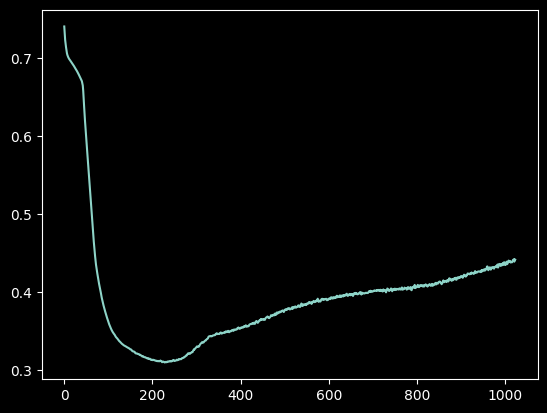

In [14]:
# Visualizando o loss 
plt.plot(historico.history['val_loss'])

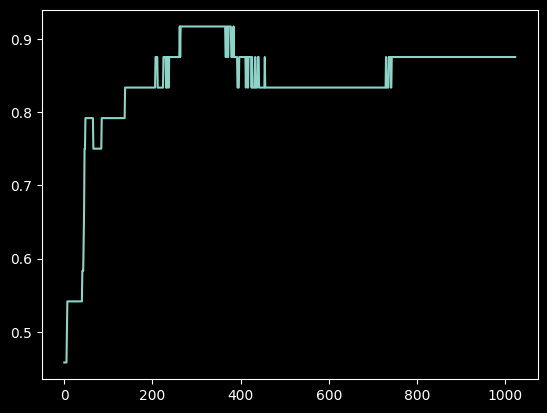

In [15]:
# Visualizando o accuracy
plt.plot(historico.history['val_accuracy'])

In [16]:
# Criando as previsões
previsoes = rede_neural.predict(X_teste)
previsoes

2/2 [==============================] - 0s 4ms/step


array([[0.00000000e+00],
       [9.99066830e-01],
       [9.99066830e-01],
       [9.99066830e-01],
       [1.63030402e-21],
       [9.99066830e-01],
       [4.21755459e-07],
       [9.99066830e-01],
       [1.20800625e-25],
       [9.99066830e-01],
       [9.99066830e-01],
       [9.99066830e-01],
       [9.99066830e-01],
       [1.08018256e-36],
       [9.99066830e-01],
       [9.58659686e-03],
       [3.13112842e-08],
       [1.00882323e-24],
       [9.99066830e-01],
       [9.99066830e-01],
       [9.99066830e-01],
       [1.66696624e-15],
       [9.99066830e-01],
       [7.81001687e-01],
       [9.99066830e-01],
       [9.99066830e-01],
       [9.99066830e-01],
       [3.35200615e-02],
       [8.31266820e-01],
       [9.99066830e-01],
       [9.99066830e-01],
       [5.98641753e-01],
       [9.99066830e-01],
       [2.30299681e-02],
       [9.99066830e-01],
       [1.45840851e-08],
       [6.37064040e-01],
       [7.91680304e-06],
       [9.99066830e-01],
       [7.72241493e-10],


In [17]:
# Convertendo as previsões
previsoes = (previsoes > 0.5)
previsoes

array([[False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False]])

In [18]:
# Comparando as resposta
from sklearn.metrics import accuracy_score
accuracy_score(previsoes, y_teste)

0.9491525423728814

<AxesSubplot:>

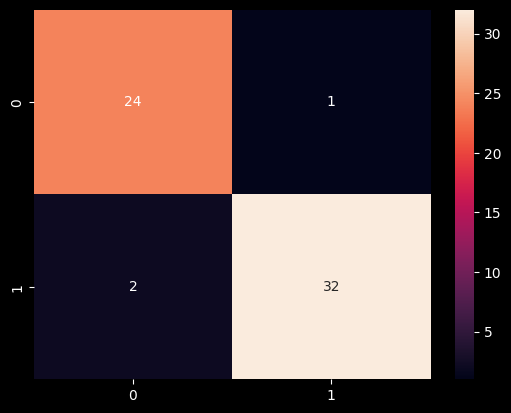

In [19]:
# Visualizando a matriz de confusão 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_teste, previsoes)
sns.heatmap(cm, annot=True)